# Módulo 1: Redes Neuronales Densas

En este cuaderno, exploraremos los fundamentos matemáticos de las redes neuronales densas y su dinámica de entrenamiento.

---

## Contenido

1. Espacios vectoriales, aplicaciones lineales y composiciones
2. Aproximación universal
3. Descenso de gradiente
4. Activaciones no lineales
5. Funciones de pérdida


## 1. Espacios Vectoriales, Aplicaciones Lineales y Composiciones

Una **capa densa** en una red neuronal es una aplicación lineal:

$$
f(\mathbf{x}) = W \mathbf{x} + b
$$

donde:

* $\mathbf{x} \in \mathbb{R}^n$ es el vector de entrada,
* $W \in \mathbb{R}^{m \times n}$ es la matriz de pesos,
* $b \in \mathbb{R}^m$ es el sesgo.

Cuando apilamos capas con funciones no lineales, obtenemos una composición:

$$
f(\mathbf{x}) = \sigma \big(W_2 (\sigma(W_1 \mathbf{x} + b_1)) + b_2 \big)
$$

donde $\sigma$ es una función de activación no lineal.


In [1]:
import tensorflow as tf
import numpy as np
import math

import matplotlib.pyplot as plt

2025-11-13 18:48:22.723047: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1763081302.750860 1883978 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1763081302.757631 1883978 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1763081302.776445 1883978 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1763081302.776494 1883978 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1763081302.776496 1883978 computation_placer.cc:177] computation placer alr

In [2]:
# Ejemplo: Una transformación lineal simple
x = tf.constant([[1.0, 2.0]], dtype=tf.float32)  # vector de entrada

#x = tf.Variable([[1.0, 2.0]], dtype=tf.float32)

#x = np.array([[1.0, 2.0]])
#x = tf.convert_to_tensor(x, dtype=tf.float32)

W = tf.constant([[2.0, -1.0],
                 [0.5, 3.0]], dtype=tf.float32)  # matrix de pesos
b = tf.constant([1.0, -2.0], dtype=tf.float32)   # bias

y = tf.matmul(x, W) + b
y

I0000 00:00:1763081309.081729 1883978 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 12222 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4070 Ti SUPER, pci bus id: 0000:07:00.0, compute capability: 8.9


<tf.Tensor: shape=(1, 2), dtype=float32, numpy=array([[4., 3.]], dtype=float32)>

In [3]:
tf.keras.activations.sigmoid(tf.matmul(x, W) + b)

<tf.Tensor: shape=(1, 2), dtype=float32, numpy=array([[0.98201376, 0.95257413]], dtype=float32)>

## 2. Aproximación Universal

* **Teorema de Aproximación Universal**: Una red neuronal feedforward con una sola capa oculta
  que contiene un número finito de neuronas puede aproximar cualquier función continua en subconjuntos compactos de $\mathbb{R}^n$,
  dada una función de activación (por ejemplo, sigmoide, ReLU).


In [4]:
# Datos
X = np.linspace(-2*np.pi, 2*np.pi, 200).reshape(-1, 1)
y_true = np.sin(X)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='tanh', input_shape=(1,)),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.fit(X, y_true, epochs=500, verbose=1)

y_pred = model.predict(X)

/home/gibran/anaconda3/envs/tf219/lib/python3.10/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/500


I0000 00:00:1763081311.150183 1884092 service.cc:152] XLA service 0x711e08005de0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1763081311.150216 1884092 service.cc:160]   StreamExecutor device (0): NVIDIA GeForce RTX 4070 Ti SUPER, Compute Capability 8.9
2025-11-13 18:48:31.168402: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1763081311.256141 1884092 cuda_dnn.cc:529] Loaded cuDNN version 91001


1/7 ━━━━━━━━━━━━━━━━━━━━ 5s 986ms/step - loss: 0.4212

I0000 00:00:1763081311.506638 1884092 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - loss: 0.4172
Epoch 2/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4257 
Epoch 3/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4242 
Epoch 4/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3830 
Epoch 5/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3750 
Epoch 6/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3715 
Epoch 7/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3675 
Epoch 8/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3560 
Epoch 9/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3394 
Epoch 10/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3549 
Epoch 11/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3480 
Epoch 12/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3239 
Epoch 13/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.3144 
Epoch 14/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3334 
Epoch 15/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3055 
Epoch 16/500
7/7 ━━━━━━━━━━━━━━

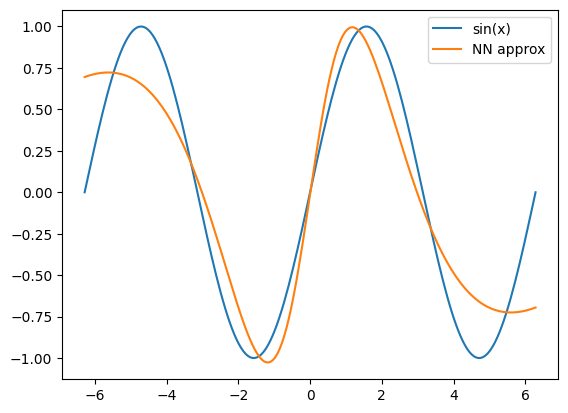

In [5]:
plt.plot(X, y_true, label="sin(x)")
plt.plot(X, y_pred, label="NN approx")
plt.legend()
plt.show()

In [6]:
def taylor_sin(x, order):
    n_terms = (order // 2) + 1  
    out = np.zeros_like(x)
    for k in range(n_terms):
        p = 2*k + 1
        out = out + ((-1)**k) * np.power(x, p) / math.factorial(p)
    return out


taylor_preds = taylor_sin(X, 5)

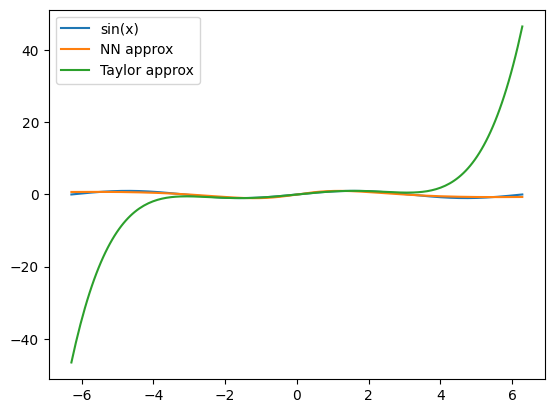

In [7]:
plt.plot(X, y_true, label="sin(x)")
plt.plot(X, y_pred, label="NN approx")
plt.plot(X, taylor_preds, label="Taylor approx")
plt.legend()
plt.show()


In [8]:
def mse(a, b):
    return float(np.mean((a - b)**2))

def max_abs_err(a, b):
    return float(np.max(np.abs(a - b)))

nn_mse = mse(y_pred, y_true)
nn_max = max_abs_err(y_pred, y_true)

t_mse = mse(taylor_preds, y_true)
t_max = max_abs_err(taylor_preds, y_true)


metrics = {
    'NeuralNet': {'MSE': nn_mse, 'MaxAbsErr': nn_max},
    'Taylor': {'MSE': t_mse, 'MaxAbsErr': t_max},
}


In [9]:
print("{:<15s}  {:>12s}  {:>12s}".format("Approximator", "MSE", "Max|err|"))
for k, v in metrics.items():
    print("{:<15s}  {:>12.6e}  {:>12.6e}".format(k, v['MSE'], v['MaxAbsErr']))

Approximator              MSE      Max|err|
NeuralNet        6.019159e-02  6.952192e-01
Taylor           1.720090e+02  4.654673e+01


## 3. Descenso de Gradiente

Minimizamos una función de pérdida $L(\theta)$ usando **descenso de gradiente**:

$$
\theta_{t+1} = \theta_t - \lambda \nabla L(\theta_t)
$$

Variantes:

* SGD (descenso de gradiente estocástico)
* Momentum
* RMSProp
* Adam

Cada una modifica la dinámica de actualización dependiendo de la curvatura de la función de pérdida.


In [10]:
def F(x):
    return (x + 1)**2

In [11]:
x = tf.Variable(initial_value=2.0, name='x', trainable=True, dtype=tf.float32)

optimizer = tf.keras.optimizers.SGD(learning_rate=0.1)

In [12]:
for _ in range(1000):

    with tf.GradientTape() as tape:
        y = F(x) 
        
    gradients = tape.gradient(y, [x])
    optimizer.apply_gradients(zip(gradients, [x]))
    print("y:",y.numpy(), "x:",x.numpy())

y: 9.0 x: 1.4
y: 5.7600007 x: 0.91999996
y: 3.6864 x: 0.53599995
y: 2.359296 x: 0.22879994
y: 1.5099493 x: -0.016960055
y: 0.9663676 x: -0.21356805
y: 0.61847526 x: -0.37085444
y: 0.39582413 x: -0.49668354
y: 0.25332746 x: -0.59734684
y: 0.16212957 x: -0.6778775
y: 0.10376291 x: -0.742302
y: 0.06640826 x: -0.7938416
y: 0.042501286 x: -0.8350733
y: 0.02720082 x: -0.8680586
y: 0.017408527 x: -0.8944469
y: 0.011141455 x: -0.9155575
y: 0.0071305353 x: -0.932446
y: 0.0045635425 x: -0.9459568
y: 0.0029206646 x: -0.9567655
y: 0.0018692244 x: -0.9654124
y: 0.0011963035 x: -0.9723299
y: 0.00076563365 x: -0.9778639
y: 0.0004900066 x: -0.9822911
y: 0.00031360507 x: -0.98583287
y: 0.00020070758 x: -0.9886663
y: 0.00012845284 x: -0.99093306
y: 8.220939e-05 x: -0.9927465
y: 5.2613665e-05 x: -0.9941972
y: 3.3672604e-05 x: -0.99535775
y: 2.1550468e-05 x: -0.9962862
y: 1.3792211e-05 x: -0.99702895
y: 8.827157e-06 x: -0.99762315
y: 5.649437e-06 x: -0.9980985
y: 3.6157303e-06 x: -0.9984788
y: 2.31414e-06

### Definiendo Modelo basado en Clase

In [19]:
# Datos
X = np.linspace(-2*np.pi, 2*np.pi, 200).reshape(-1, 1)
y_true = np.sin(X)

In [20]:
class MyModel(tf.keras.Model):
    def __init__(self):
        super(MyModel, self).__init__()
        self.d1 = tf.keras.layers.Dense(64, activation='tanh')
        self.out = tf.keras.layers.Dense(1)

    def call(self, x):
        x = self.d1(x) 
        return self.out(x)

model = MyModel()

In [21]:
#F = sum((y_true - model(x))**2)
#dF/dW = 0

In [22]:
# Optimizador and función de perdida
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
loss_fn = tf.keras.losses.MeanSquaredError()

dataset = tf.data.Dataset.from_tensor_slices((X, y_true)).batch(32)

# Training step
@tf.function
def train_step(x_batch, y_batch):
    with tf.GradientTape() as tape:
        predictions = model(x_batch, training=True)
        loss = loss_fn(y_batch, predictions)
    # Calcular gradientes
    gradients = tape.gradient(loss, model.trainable_variables)
    # Aplicar actualización
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))
    return loss

In [23]:
EPOCHS = 100
for epoch in range(EPOCHS):
    for step, (x_batch, y_batch) in enumerate(dataset):
        loss = train_step(x_batch, y_batch)
    print(f"Epoch {epoch+1}, Loss: {loss.numpy():.4f}")

Epoch 1, Loss: 0.2897
Epoch 2, Loss: 0.0425
Epoch 3, Loss: 0.0464
Epoch 4, Loss: 0.1329
Epoch 5, Loss: 0.0659
Epoch 6, Loss: 0.0548
Epoch 7, Loss: 0.1441
Epoch 8, Loss: 0.1041
Epoch 9, Loss: 0.1163
Epoch 10, Loss: 0.1600
Epoch 11, Loss: 0.1489
Epoch 12, Loss: 0.1837
Epoch 13, Loss: 0.1981
Epoch 14, Loss: 0.2076
Epoch 15, Loss: 0.2291
Epoch 16, Loss: 0.2340
Epoch 17, Loss: 0.2487
Epoch 18, Loss: 0.2571
Epoch 19, Loss: 0.2654
Epoch 20, Loss: 0.2737
Epoch 21, Loss: 0.2784
Epoch 22, Loss: 0.2837
Epoch 23, Loss: 0.2863
Epoch 24, Loss: 0.2884
Epoch 25, Loss: 0.2893
Epoch 26, Loss: 0.2891
Epoch 27, Loss: 0.2883
Epoch 28, Loss: 0.2866
Epoch 29, Loss: 0.2843
Epoch 30, Loss: 0.2814
Epoch 31, Loss: 0.2782


2025-11-13 18:58:24.628548: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 32, Loss: 0.2745
Epoch 33, Loss: 0.2706
Epoch 34, Loss: 0.2666
Epoch 35, Loss: 0.2624
Epoch 36, Loss: 0.2581
Epoch 37, Loss: 0.2538
Epoch 38, Loss: 0.2496
Epoch 39, Loss: 0.2453
Epoch 40, Loss: 0.2411
Epoch 41, Loss: 0.2370
Epoch 42, Loss: 0.2330
Epoch 43, Loss: 0.2291
Epoch 44, Loss: 0.2253
Epoch 45, Loss: 0.2216
Epoch 46, Loss: 0.2179
Epoch 47, Loss: 0.2144
Epoch 48, Loss: 0.2110
Epoch 49, Loss: 0.2077
Epoch 50, Loss: 0.2045
Epoch 51, Loss: 0.2014
Epoch 52, Loss: 0.1983
Epoch 53, Loss: 0.1954
Epoch 54, Loss: 0.1925
Epoch 55, Loss: 0.1897
Epoch 56, Loss: 0.1870
Epoch 57, Loss: 0.1844
Epoch 58, Loss: 0.1819
Epoch 59, Loss: 0.1794
Epoch 60, Loss: 0.1770
Epoch 61, Loss: 0.1746
Epoch 62, Loss: 0.1724
Epoch 63, Loss: 0.1702
Epoch 64, Loss: 0.1680
Epoch 65, Loss: 0.1660
Epoch 66, Loss: 0.1640
Epoch 67, Loss: 0.1620
Epoch 68, Loss: 0.1601
Epoch 69, Loss: 0.1583
Epoch 70, Loss: 0.1565
Epoch 71, Loss: 0.1548
Epoch 72, Loss: 0.1532
Epoch 73, Loss: 0.1516
Epoch 74, Loss: 0.1500
Epoch 75, L

In [24]:
y_pred = model.predict(X)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


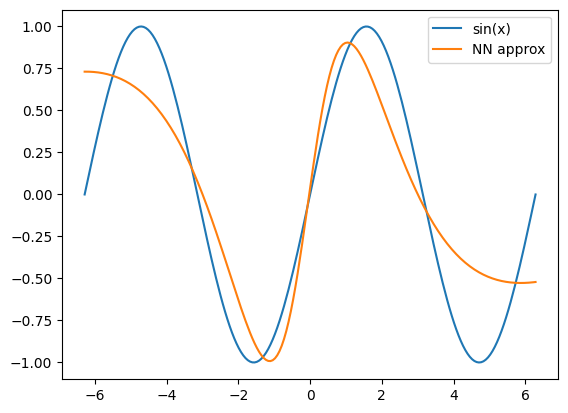

In [25]:
plt.plot(X, y_true, label="sin(x)")
plt.plot(X, y_pred, label="NN approx")
plt.legend()
plt.show()

## 4. Funciones de Activación

No linealidades comunes:

* Sigmoide: acotada, suave, sufre del problema del gradiente que desaparece.
* Tanh: centrada en cero, aún presenta desaparición del gradiente para entradas grandes.
* ReLU: no saturante, activaciones dispersas.
* GELU: versión suave de ReLU, usada frecuentemente en transformadores.


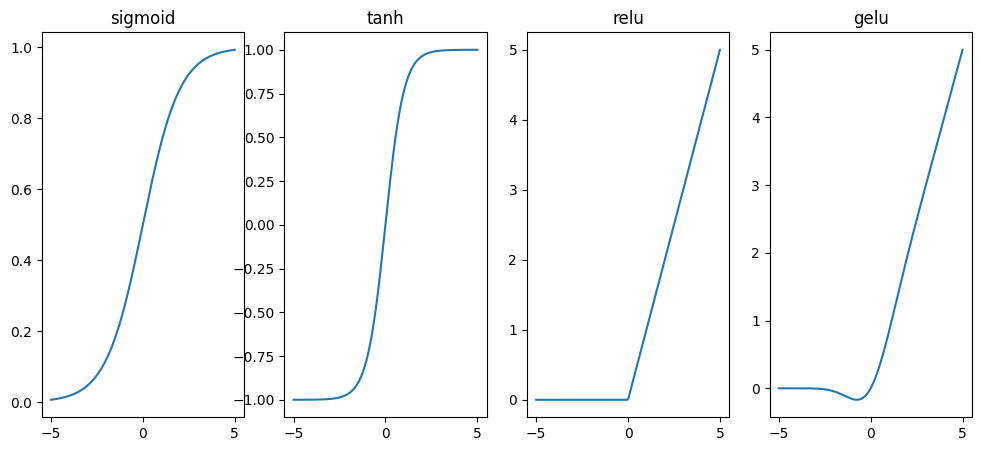

In [23]:
# Plots
activations = {
    "sigmoid": tf.nn.sigmoid,
    "tanh": tf.nn.tanh,
    "relu": tf.nn.relu,
    "gelu": tf.nn.gelu
}

x = np.linspace(-5, 5, 200)

plt.figure(figsize=(12,5))
for i, (name, f) in enumerate(activations.items()):
    plt.subplot(1,4,i+1)
    y = f(x).numpy()
    plt.plot(x, y, label=name)
    plt.title(name)
plt.show()


## 5. Funciones de Pérdida

En este notebook exploraremos las funciones de pérdida más usadas en *deep learning*,
su interpretación matemática y cómo implementarlas en TensorFlow/Keras.

---

## Contenido

5.1 Pérdidas para regresión

* MSE
* MAE
* Huber

5.2 Pérdidas para clasificación

* Entropía Cruzada Binaria (*Binary Cross-Entropy*)
* Entropía Cruzada Categórica (*Categorical Cross-Entropy*)
* Entropía Cruzada Categórica Dispersa (*Sparse Categorical Cross-Entropy*)

5.3 Regularización en la pérdida

5.4 Ejercicios comparativos

---


### 5.1. Pérdidas para Regresión

#### Mean Squared Error (MSE)
$$
L = \frac{1}{N}\sum_{i=1}^N (y_i - \hat{y}_i)^2
$$

Asume que los errores siguen una distribución Gaussiana.

#### Mean Absolute Error (MAE)
$$
L = \frac{1}{N}\sum_{i=1}^N |y_i - \hat{y}_i|
$$

Más robusta a outliers.

#### Huber Loss
$$
L_\delta =
\begin{cases}
\frac{1}{2}(y - \hat{y})^2 & \text{if } |y - \hat{y}| < \delta \\
\delta |y - \hat{y}| - \frac{1}{2}\delta^2 & \text{otherwise}
\end{cases}
$$

Combina MSE (cerca del error pequeño) y MAE (para outliers).


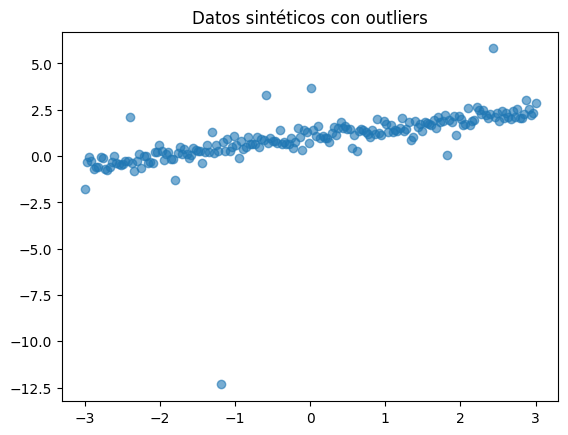

In [24]:
# Datos sintéticos
X = np.linspace(-3, 3, 200).reshape(-1, 1)
y_true = 0.5 * X + 1 + 0.3 * np.random.randn(*X.shape)

# Añadimos outliers
y_true[::20] += np.random.randn(*y_true[::20].shape) * 6

plt.scatter(X, y_true, alpha=0.6)
plt.title("Datos sintéticos con outliers")
plt.show()

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


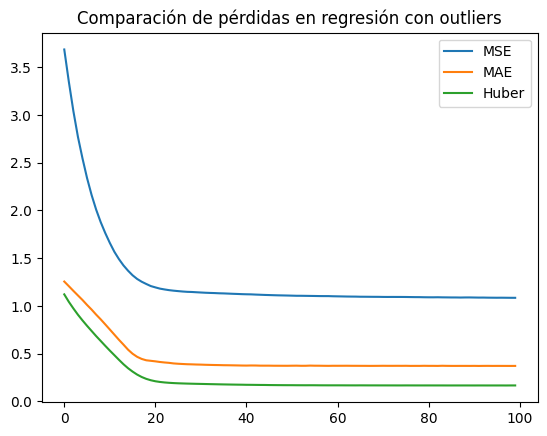

In [25]:
def build_reg_model():
    return tf.keras.Sequential([
        tf.keras.layers.Dense(32, activation="relu", input_shape=(1,)),
        tf.keras.layers.Dense(1)
    ])

losses = {
    "MSE": tf.keras.losses.MeanSquaredError(),
    "MAE": tf.keras.losses.MeanAbsoluteError(),
    "Huber": tf.keras.losses.Huber(delta=1.0)
}

histories = {}
preds = {}

for name, loss_fn in losses.items():
    model = build_reg_model()
    model.compile(optimizer="adam", loss=loss_fn)
    h = model.fit(X, y_true, epochs=100, verbose=0)
    histories[name] = h.history['loss']
    preds[name] = model.predict(X)

for name, loss in histories.items():
    plt.plot(loss, label=name)
plt.legend()
plt.title("Comparación de pérdidas en regresión con outliers")
plt.show()

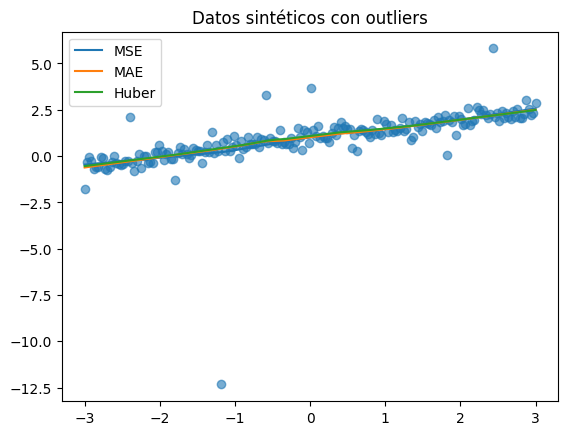

In [26]:
plt.scatter(X, y_true, alpha=0.6)
plt.plot(X, preds['MSE'], label="MSE")
plt.plot(X, preds['MAE'], label="MAE")
plt.plot(X, preds['Huber'], label="Huber")
plt.title("Datos sintéticos con outliers")
plt.legend()
plt.show()

### 5.2 Pérdidas para Clasificación

#### Binary Cross-Entropy
$$
L = - \frac{1}{N} \sum_i \big[ y_i \log \hat{y}_i + (1-y_i)\log(1-\hat{y}_i) \big]
$$

#### Categorical Cross-Entropy
$$
L = - \sum_{i=1}^C y_i \log \hat{y}_i
$$

#### Sparse Categorical Cross-Entropy
$$
L = - \log \hat{y}_i
$$

In [27]:
# Supongamos 3 clases
y_true_onehot = np.array([[0, 0, 1],   # clase 2
                          [1, 0, 0]])  # clase 0

y_true_onehot

array([[0, 0, 1],
       [1, 0, 0]])

In [28]:
y_true_sparse = np.array([2, 0])       # enteros: clase 2 y clase 0

In [29]:
# Predicciones (softmax simuladas)
y_pred = np.array([[0.1, 0.2, 0.7], 
                   [0.8, 0.1, 0.1]])

In [30]:
# Usando categorical_crossentropy (one-hot)
loss_cat = tf.keras.losses.CategoricalCrossentropy()
print("Categorical CE:", loss_cat(y_true_onehot, y_pred).numpy())

# Usando sparse_categorical_crossentropy (etiquetas como enteros)
loss_sparse = tf.keras.losses.SparseCategoricalCrossentropy()
print("Sparse Categorical CE:", loss_sparse(y_true_sparse, y_pred).numpy())

Categorical CE: 0.28990924
Sparse Categorical CE: 0.28990924


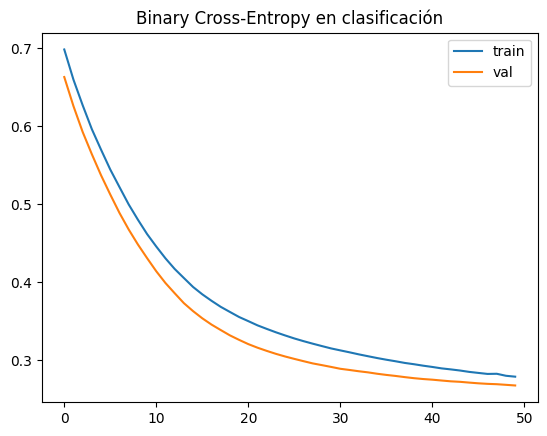

In [26]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

# Datos clasificación binaria
X, y = make_moons(n_samples=500, noise=0.2, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation="relu", input_shape=(2,)),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="adam",
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=["accuracy"])
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, verbose=0)

plt.plot(history.history["loss"], label="train")
plt.plot(history.history["val_loss"], label="val")
plt.legend()
plt.title("Binary Cross-Entropy en clasificación")
plt.show()

In [33]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

In [35]:
X_train.shape

(60000, 28, 28)

In [29]:
# Example multiclass: MNIST
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
X_train = X_train.reshape(-1, 28*28).astype("float32") / 255.0
X_test = X_test.reshape(-1, 28*28).astype("float32") / 255.0

model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation="relu", input_shape=(784,)),
    tf.keras.layers.Dense(10, activation="softmax")
])

# Usamos sparse categorical, pues y son enteros [0..9]
model.compile(optimizer="adam",
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=["accuracy"])

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5)

Epoch 1/5


2025-11-13 19:12:57.269241: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_95', 4 bytes spill stores, 4 bytes spill loads



1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8808 - loss: 0.4182 - val_accuracy: 0.9516 - val_loss: 0.1582
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9658 - loss: 0.1217 - val_accuracy: 0.9644 - val_loss: 0.1130
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9750 - loss: 0.0816 - val_accuracy: 0.9728 - val_loss: 0.0890
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9830 - loss: 0.0576 - val_accuracy: 0.9733 - val_loss: 0.0908
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9863 - loss: 0.0451 - val_accuracy: 0.9748 - val_loss: 0.0803


In [33]:
pred = model.predict(X_test)
pred

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[4.5176562e-06, 3.8404927e-08, 2.0552719e-04, ..., 9.9953169e-01,
        2.8260690e-06, 2.9680200e-06],
       [1.3325629e-07, 4.4224376e-05, 9.9995446e-01, ..., 1.5703828e-14,
        3.0088222e-07, 3.0778713e-13],
       [2.8164229e-07, 9.9918514e-01, 4.0515669e-04, ..., 3.3014404e-04,
        5.1893720e-05, 2.4949387e-07],
       ...,
       [9.2065952e-11, 4.6201068e-10, 1.8254337e-10, ..., 2.4985404e-05,
        2.2283470e-05, 5.3544832e-06],
       [3.8640002e-09, 3.1632627e-11, 5.9534690e-11, ..., 3.3216567e-09,
        1.7574127e-06, 1.8314598e-09],
       [3.5219321e-06, 3.3141651e-13, 6.8034134e-10, ..., 3.9353229e-13,
        7.4870207e-11, 3.9548309e-11]], dtype=float32)

### 5.3 Loss regularization


$$
L = L_{\text{data}} + \lambda \|W\|^2
$$

In [34]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation="relu", 
                          kernel_regularizer=tf.keras.regularizers.l2(1e-4),
                          input_shape=(784,)),
    tf.keras.layers.Dense(10, activation="softmax")
])